In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from tensorflow.keras.models import load_model 
import warnings
warnings.filterwarnings("ignore")

2024-04-27 06:26:39.117953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
defective = os.listdir("casting-data/casting-data/train/def-front")
ok= os.listdir("casting-data/casting-data/train/ok-front")

In [3]:
ok_paths = []
base_path = "casting-data/casting-data/train/ok-front"  # Base directory path

for file_name in tqdm(ok):
    file_path = os.path.join(base_path, file_name)
    ok_paths.append(file_path)

100%|██████████| 2875/2875 [00:00<00:00, 307555.19it/s]


In [4]:
def_paths = []
base_path = "casting_data/casting_data/train/def_front"  # Base directory path

for file_name in tqdm(defective):
    file_path = os.path.join(base_path, file_name)
    def_paths.append(file_path)

100%|██████████| 3758/3758 [00:00<00:00, 266167.86it/s]


In [6]:
defective_labels  = np.ones(len(def_paths)) # 1=defect
ok_labels=np.zeros(len(ok_paths)) # 0=ok

In [7]:
train_paths = np.concatenate([
    np.array(ok_paths),
    np.array(def_paths)
])
train_labels = np.concatenate([
    ok_labels,
    defective_labels
])

In [8]:
df = pd.DataFrame({"path":train_paths, "label":train_labels})

In [9]:
df.count()

path     6633
label    6633
dtype: int64

In [10]:
df.head(10)

,path,label
0,casting_data/casting_data/train/ok_front/cast_...,0.0
1,casting_data/casting_data/train/ok_front/cast_...,0.0
2,casting_data/casting_data/train/ok_front/cast_...,0.0
3,casting_data/casting_data/train/ok_front/cast_...,0.0
4,casting_data/casting_data/train/ok_front/cast_...,0.0
5,casting_data/casting_data/train/ok_front/cast_...,0.0
6,casting_data/casting_data/train/ok_front/cast_...,0.0
7,casting_data/casting_data/train/ok_front/cast_...,0.0
8,casting_data/casting_data/train/ok_front/cast_...,0.0
9,casting_data/casting_data/train/ok_front/cast_...,0.0


In [11]:
df.tail(10)

,path,label
6623,casting_data/casting_data/train/def_front/cast...,1.0
6624,casting_data/casting_data/train/def_front/cast...,1.0
6625,casting_data/casting_data/train/def_front/cast...,1.0
6626,casting_data/casting_data/train/def_front/cast...,1.0
6627,casting_data/casting_data/train/def_front/cast...,1.0
6628,casting_data/casting_data/train/def_front/cast...,1.0
6629,casting_data/casting_data/train/def_front/cast...,1.0
6630,casting_data/casting_data/train/def_front/cast...,1.0
6631,casting_data/casting_data/train/def_front/cast...,1.0
6632,casting_data/casting_data/train/def_front/cast...,1.0


In [12]:
df.sample(10)

,path,label
5154,casting_data/casting_data/train/def_front/cast...,1.0
3326,casting_data/casting_data/train/def_front/cast...,1.0
5724,casting_data/casting_data/train/def_front/cast...,1.0
2030,casting_data/casting_data/train/ok_front/cast_...,0.0
3431,casting_data/casting_data/train/def_front/cast...,1.0
6542,casting_data/casting_data/train/def_front/cast...,1.0
1393,casting_data/casting_data/train/ok_front/cast_...,0.0
3988,casting_data/casting_data/train/def_front/cast...,1.0
220,casting_data/casting_data/train/ok_front/cast_...,0.0
3921,casting_data/casting_data/train/def_front/cast...,1.0


In [13]:
df.describe()

,label
count,6633.000000
mean,0.566561
std,0.495587
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


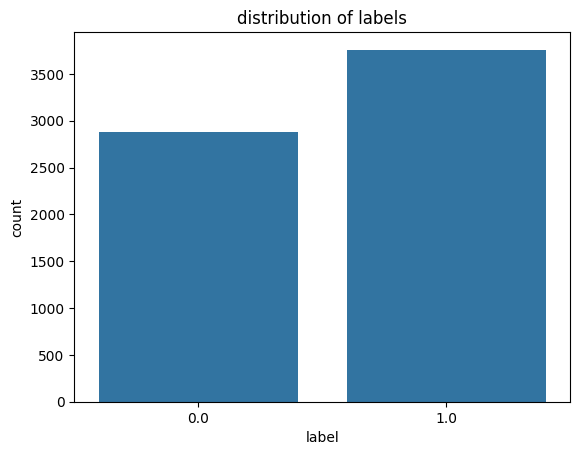

In [14]:
import seaborn as sns

sns.countplot(x=df['label'])
plt.title('distribution of labels')
plt.show()

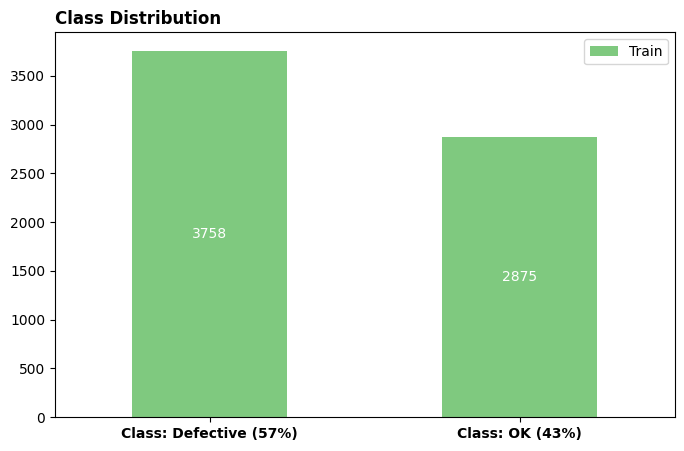

In [15]:
# Create dataframe of class distribution
n_train = [len(defective), len(ok)]
dist_df = pd.DataFrame(
    data=[n_train],
    columns=['Defective', 'OK'],
    index=['Train'])

# Visualize class distribution
ax = dist_df.T.plot(kind='bar', stacked=True, rot=0, figsize=(8,5), colormap='Accent')
ax.set_title('Class Distribution', loc='left', weight='bold')
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()-0.25, 
            bar.get_y()+bar.get_height()/2,
            int(bar.get_height()),
            ha='center', va='center', color='white')
pct_def = 100*dist_df['Defective'].values.sum()/dist_df.values.sum()
pct_ok = 100-pct_def
ax.set_xticklabels([f'Class: Defective ({pct_def:.0f}%)',
                    f'Class: OK ({pct_ok:.0f}%)'], weight='bold')
plt.show()


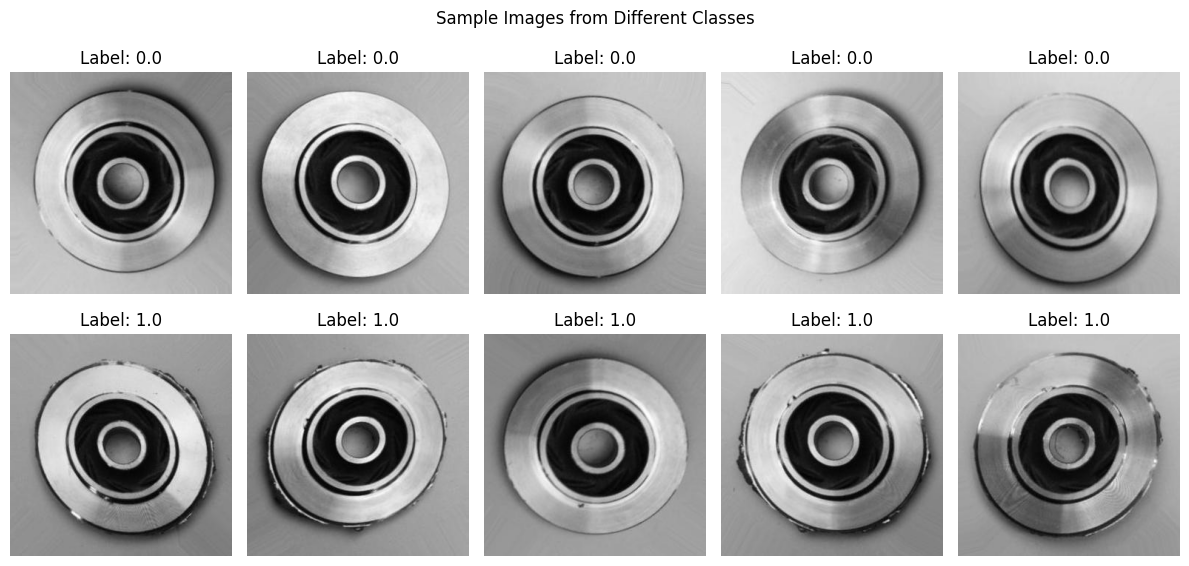

In [16]:
from PIL import Image

# Loading and displaying a few sample images
num_samples = 5
sample_images = df.groupby('label').apply(lambda x: x.sample(num_samples))['path'].values
sample_labels = df.groupby('label').apply(lambda x: x.sample(num_samples))['label'].values

plt.figure(figsize=(12, 6))
for idx, (img_path, label) in enumerate(zip(sample_images, sample_labels)):
    img = Image.open(img_path)
    plt.subplot(2, num_samples, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Label: {label}')  # Display label as title

plt.suptitle('Sample Images from Different Classes')
plt.tight_layout()
plt.show()

In [17]:
with Image.open(df['path'][7] )as img: #picked any ramdom image to get the size
            print(img.size)

(300, 300)


In [18]:
paths = np.array(df.path)
labels = np.array(df.label)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(paths, labels, test_size = 0.25)

In [20]:
# !pip install tensorflow

In [21]:
import tensorflow as tf

#pre-processing
def load_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels = 3)#converts the data in (jpeg)RGB format
    image = tf.image.resize(image, size=(256, 256))
    image = tf.cast(image, dtype= tf.float32)/255
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
train_dataset = train_dataset.map(load_image)
train_dataset = train_dataset.shuffle(buffer_size=500)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [22]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [23]:
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))
test_dataset = test_dataset.map(load_image)
test_dataset = test_dataset.shuffle(buffer_size=500)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [24]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [25]:
from tensorflow.keras.applications import ResNet50V2

# Load the ResNet50V2 pre-trained model
base_model_resnet = ResNet50V2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# only last 10 layers of the pretrained model are used 
for layer in base_model_resnet.layers[:-10]:
    layer.trainable = False

# model creation
model_resnet = tf.keras.Sequential([
    base_model_resnet,
    tf.keras.layers.GlobalAveragePooling2D(), #it id done to reduce dimensionality
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),#it is done to lower the variance that is overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_resnet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24089601 (91.89 MB)
Trainable params: 3940865 (15.03 MB)
Non-trainable params: 20148736 (76.86 MB)
_________

In [26]:
model_resnet.fit(train_dataset,
         epochs = 5,
          validation_data = test_dataset
         )

Epoch 1/5
156/156 [==============================] - 997s 6s/step - loss: 0.0812 - accuracy: 0.9696 - val_loss: 0.0206 - val_accuracy: 0.9934
Epoch 2/5
156/156 [==============================] - 904s 6s/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0184 - val_accuracy: 0.9958
Epoch 3/5
156/156 [==============================] - 919s 6s/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0120 - val_accuracy: 0.9952
Epoch 4/5
156/156 [==============================] - 963s 6s/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.0142 - val_accuracy: 0.9958
Epoch 5/5
156/156 [==============================] - 880s 6s/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.0354 - val_accuracy: 0.9940


In [27]:
model_resnet.save("defect_model.h5")

model_resnet=load_model('defect_model.h5')

In [28]:
xtest, ytest = next(iter(test_dataset))

In [29]:
ypred_x = model_resnet.predict(xtest)

1/1 [==============================] - 5s 5s/step


In [30]:
ypred_x

array([[1.0000000e+00],
       [6.1108371e-06],
       [1.0000000e+00],
       [2.4496585e-06],
       [4.2864153e-07],
       [1.0000000e+00],
       [2.0711907e-07],
       [4.0767940e-09],
       [1.0000000e+00],
       [4.5309475e-06],
       [4.3792264e-10],
       [1.2724547e-07],
       [9.0709046e-12],
       [1.0000000e+00],
       [5.8130245e-06],
       [9.9999994e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.2575513e-06],
       [3.0843377e-05],
       [8.4156463e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3193601e-06],
       [1.0000000e+00],
       [4.8942411e-07]], dtype=float32)

In [31]:
prediction_x=[np.argmax(ypred_x[i]) for i in range(len(ypred_x))]

In [32]:
prediction_x #all will be zero since xtest is of ok one's

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
# Evaluate the model on the test dataset
loss, accuracy = model_resnet.evaluate(test_dataset)
print("Test Accuracy:", accuracy)


52/52 [==============================] - 196s 4s/step - loss: 0.0354 - accuracy: 0.9940
Test Accuracy: 0.9939723014831543


In [36]:
def predict(image_path):
    try:
        # Load and preprocess the single image
        img = Image.open(image_path)
        img = img.resize((256, 256))  # Resize the image to match the model's input size
        img = np.array(img) / 255.0  # Normalize pixel values
        plt.imshow(img)

        # Reshape the image for prediction (add a batch dimension)
        img = np.expand_dims(img, axis=0)  # (1, 256, 256, 3)

        # Use the trained model to make predictions
        predicted_probabilities = model_resnet.predict(img)

        # Assuming a threshold of 0.5 for binary classification
        threshold = 0.5
        predicted_label = "Faulty Casting mold" if predicted_probabilities[0][0] >= threshold else "Casting mold is good"

        print(f"Predicted Probability: {predicted_probabilities[0][0]}")
        print(f"Predicted Label: {predicted_label}")

    except OSError as e:
        print("Error:", e)
    

1/1 [==============================] - 2s 2s/step
Predicted Probability: 1.0
Predicted Label: Faulty Casting mold


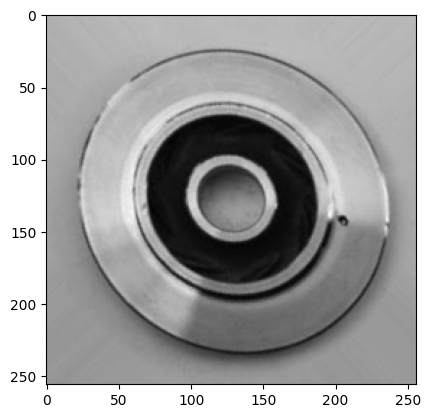

In [37]:
predict('casting_data/casting_data/test/def_front/cast_def_0_162.jpeg')

1/1 [==============================] - 0s 192ms/step
Predicted Probability: 3.0755575863850027e-10
Predicted Label: Casting mold is good


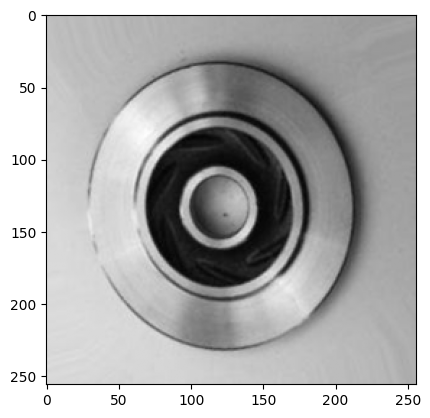

In [38]:
predict( 'casting_data/casting_data/test/ok_front/cast_ok_0_1019.jpeg')